<font size=4>例子:</font>

<font size=4>我们还是以一个简单的例子来介绍算法的流程。假设我们需要寻找函数 $y=x_1^2+x_2^2+x_3^3+x_4^4$ 在 $[1,30]$ 之间的最大值。我们很容易就知道，当 $x_1=x_2=x_3=x_4=30$ 时，该函数能取到最大值。</font>



###  the current codes have correctness problem...

In [30]:
# import numpy as np
# import matplotlib.pyplot as plt
 
 
# class ACO:
#     def __init__(self, parameters):
#         """
#         Ant Colony Optimization
#         parameter: a list type, like [NGEN, pop_size, var_num_min, var_num_max]
#         """
#         # 初始化
#         self.NGEN = parameters[0]  # 迭代的代数
#         self.pop_size = parameters[1]  # 种群大小
#         self.var_num = len(parameters[2])  # 变量个数
#         self.bound = []  # 变量的约束范围
#         self.bound.append(parameters[2])
#         self.bound.append(parameters[3])
 
#         self.pop_x = np.zeros((self.pop_size, self.var_num))  # 所有蚂蚁的位置
#         self.g_best = np.zeros((1, self.var_num))  # 全局蚂蚁最优的位置
 
#         # 初始化第0代初始全局最优解
#         temp = -1
#         for i in range(self.pop_size):
#             for j in range(self.var_num):
#                 self.pop_x[i][j] = np.random.uniform(self.bound[0][j], self.bound[1][j])
#             fit = self.fitness(self.pop_x[i])
#             if fit > temp:
#                 self.g_best = self.pop_x[i]
#                 temp = fit
 
#     def fitness(self, ind_var):
#         """
#         个体适应值计算
#         """
#         x1 = ind_var[0]
#         x2 = ind_var[1]
#         x3 = ind_var[2]
#         x4 = ind_var[3]
#         y = x1 ** 2 + x2 ** 2 + x3 ** 3 + x4 ** 4
#         return y
 
#     def update_operator(self, gen, t, t_max):
#         """
#         更新算子：根据概率更新下一时刻的位置
#         """
#         rou = 0.8   # 信息素挥发系数
#         Q = 1       # 信息释放总量
#         lamda = 1 / gen
#         pi = np.zeros(self.pop_size)
#         for i in range(self.pop_size):
#             for j in range(self.var_num):
#                 pi[i] = (t_max - t[i]) / t_max
#                 # 更新位置
#                 if pi[i] < np.random.uniform(0, 1):
#                     self.pop_x[i][j] = self.pop_x[i][j] + 
#                                         np.random.uniform(-1, 1) * lamda
#                 else:
#                     self.pop_x[i][j] = self.pop_x[i][j] + 
#                                         np.random.uniform(-1, 1) * 
#                                 (self.bound[1][j] - self.bound[0][j]) / 2
#                 # 越界保护
#                 if self.pop_x[i][j] < self.bound[0][j]:
#                     self.pop_x[i][j] = self.bound[0][j]
#                 if self.pop_x[i][j] > self.bound[1][j]:
#                     self.pop_x[i][j] = self.bound[1][j]
#             # 更新t值
#             t[i] = (1 - rou) * t[i] + Q * self.fitness(self.pop_x[i])
#             # 更新全局最优值
#             if self.fitness(self.pop_x[i]) > self.fitness(self.g_best):
#                 self.g_best = self.pop_x[i]
#         t_max = np.max(t)
#         return t_max, t
 
#     def main(self):
#         popobj = []
#         best = np.zeros((1, self.var_num))[0]
#         for gen in range(1, self.NGEN + 1):
#             if gen == 1:
#                 tmax, t = self.update_operator(gen, np.array(list(map(self.fitness, self.pop_x))),
#                                      np.max(np.array(list(map(self.fitness, self.pop_x)))))
#             else:
#                tmax, t = self.update_operator(gen, t, tmax)
#             popobj.append(self.fitness(self.g_best))
#             print('############ Generation {} ############'.format(str(gen)))
#             print(self.g_best)
#             print(self.fitness(self.g_best))
#             if self.fitness(self.g_best) > self.fitness(best):
#                 best = self.g_best.copy()
#             print('最好的位置：{}'.format(best))
#             print('最大的函数值：{}'.format(self.fitness(best)))
#         print("---- End of (successful) Searching ----")
 
#         plt.figure()
#         plt.title("Figure1")
#         plt.xlabel("iterators", size=14)
#         plt.ylabel("fitness", size=14)
#         t = [t for t in range(1, self.NGEN + 1)]
#         plt.plot(t, popobj, color='b', linewidth=2)
#         plt.show()
 
 
# if __name__ == '__main__':
#     NGEN = 200
#     popsize = 500
#     low = [1, 1, 1, 1]
#     up = [30, 30, 30, 30]
#     parameters = [NGEN, popsize, low, up]
#     aco = ACO(parameters)
#     aco.main()

<font size=4>例子:  TSP问题 </font>

## design and verify the read_tsp() method correctness

In [31]:
# 读取数据
def read_tsp_test(path):
    lines = open(path, 'r').readlines()
    assert 'NODE_COORD_SECTION\n' in lines
    index = lines.index('NODE_COORD_SECTION\n')
    data = lines[index + 1:-1]
    tmp = []
    for line in data:
        line = line.strip().split(' ')
        if line[0] == 'EOF':
            continue
        tmpline = []
        for x in line:
            if x == '':
                continue
            else:
                tmpline.append(float(x))
        if tmpline == []:
            continue
        tmp.append(tmpline)
    data = tmp
    return data


# data = read_tsp_test('../data/st70.tsp')
# data

TSP_code1
(it will take about 4~5minutes to calculate it.)

ACO class

In [32]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt


class ACO(object):
    def __init__(self, num_city, data):
        self.m = 50  # 蚂蚁数量
        self.alpha = 1  # 信息素重要程度因子
        self.beta = 5  # 启发函数重要因子
        self.rho = 0.1  # 信息素挥发因子
        self.Q = 1  # 常量系数
        self.num_city = num_city  # 城市规模
        self.location = data  # 城市坐标
        self.Tau = np.zeros([num_city, num_city])  # 信息素矩阵
        self.Table = [[0 for _ in range(num_city)] for _ in range(self.m)]  # 生成的蚁群
        self.iter = 1
        # 这里在调试基础错误,暂时将iter_max(最大迭代次数)设置的较小
        self.iter_max = 200
        self.dis_mat = self.compute_dis_mat(num_city, self.location)  # 计算城市之间的距离矩阵
        self.Eta = 10. / self.dis_mat  # 启发式函数
        self.paths = None  # 蚁群中每个个体的长度
        # 存储存储每个温度下的最终路径，画出收敛图
        self.iter_x = []
        self.iter_y = []
        # self.greedy_init(self.dis_mat,100,num_city)
    def greedy_init(self, dis_mat, num_total, num_city):
        start_index = 0
        result = []
        for i in range(num_total):
            rest = [x for x in range(0, num_city)]
            # 所有起始点都已经生成了
            if start_index >= num_city:
                start_index = np.random.randint(0, num_city)
                result.append(result[start_index].copy())
                continue
            current = start_index
            rest.remove(current)
            # 找到一条最近邻路径
            result_one = [current]
            while len(rest) != 0:
                tmp_min = math.inf
                tmp_choose = -1
                for x in rest:
                    if dis_mat[current][x] < tmp_min:
                        tmp_min = dis_mat[current][x]
                        tmp_choose = x

                current = tmp_choose
                result_one.append(tmp_choose)
                rest.remove(tmp_choose)
            result.append(result_one)
            start_index += 1
        pathlens = self.compute_paths(result)
        sortindex = np.argsort(pathlens)
        index = sortindex[0]
        result = result[index]
        for i in range(len(result)-1):
            s = result[i]
            s2 = result[i+1]
            self.Tau[s][s2]=1
        self.Tau[result[-1]][result[0]] = 1
        # for i in range(num_city):
        #     for j in range(num_city):
        # return result

    # 轮盘赌选择
    def rand_choose(self, p):
        x = np.random.rand()
        for i, t in enumerate(p):
            x -= t
            if x <= 0:
                break
        return i

    # 生成蚁群
    def get_ants(self, num_city):
        for i in range(self.m):
            start = np.random.randint(num_city - 1)
            self.Table[i][0] = start
            unvisit = list([x for x in range(num_city) if x != start])
            current = start
            j = 1
            while len(unvisit) != 0:
                P = []
                # 通过信息素计算城市之间的转移概率
                for v in unvisit:
                    P.append(self.Tau[current][v] ** self.alpha * self.Eta[current][v] ** self.beta)
                P_sum = sum(P)
                P = [x / P_sum for x in P]
                # 轮盘赌选择一个一个城市
                index = self.rand_choose(P)
                current = unvisit[index]
                self.Table[i][j] = current
                unvisit.remove(current)
                j += 1

    # 计算不同城市之间的距离
    def compute_dis_mat(self, num_city, location):
        dis_mat = np.zeros((num_city, num_city))
        for i in range(num_city):
            for j in range(num_city):
                if i == j:
                    dis_mat[i][j] = np.inf
                    continue
                a = location[i]
                b = location[j]
                tmp = np.sqrt(sum([(x[0] - x[1]) ** 2 for x in zip(a, b)]))
                dis_mat[i][j] = tmp
        return dis_mat

    # 计算一条路径的长度
    def compute_pathlen(self, path, dis_mat):
        a = path[0]
        b = path[-1]
        result = dis_mat[a][b]
        for i in range(len(path) - 1):
            a = path[i]
            b = path[i + 1]
            result += dis_mat[a][b]
        return result

    # 计算一个群体的长度
    def compute_paths(self, paths):
        result = []
        for one in paths:
            length = self.compute_pathlen(one, self.dis_mat)
            result.append(length)
        return result

    # 更新信息素
    def update_Tau(self):
        delta_tau = np.zeros([self.num_city, self.num_city])
        paths = self.compute_paths(self.Table)
        for i in range(self.m):
            for j in range(self.num_city - 1):
                a = self.Table[i][j]
                b = self.Table[i][j + 1]
                delta_tau[a][b] = delta_tau[a][b] + self.Q / paths[i]
            a = self.Table[i][0]
            b = self.Table[i][-1]
            delta_tau[a][b] = delta_tau[a][b] + self.Q / paths[i]
        self.Tau = (1 - self.rho) * self.Tau + delta_tau

    def aco(self):
        best_lenth = math.inf
        best_path = None
        for cnt in range(self.iter_max):
            # 生成新的蚁群
            self.get_ants(self.num_city)  # out>>self.Table
            self.paths = self.compute_paths(self.Table)
            # 取该蚁群的最优解
            tmp_lenth = min(self.paths)
            tmp_path = self.Table[self.paths.index(tmp_lenth)]
            # 可视化初始的路径
            if cnt == 0:
                init_show = self.location[tmp_path]
                init_show = np.vstack([init_show, init_show[0]])
            # 更新最优解
            if tmp_lenth < best_lenth:
                best_lenth = tmp_lenth
                best_path = tmp_path
            # 更新信息素
            self.update_Tau()

            # 保存结果
            self.iter_x.append(cnt)
            self.iter_y.append(best_lenth)
           
            print(cnt,best_lenth)
        return best_lenth, best_path

    def run(self):
        best_length, best_path = self.aco()
        return self.location[best_path], best_length



read in data (stp70)

In [33]:

# 读取数据
def read_tsp(path):
    lines = open(path, 'r').readlines()
    assert 'NODE_COORD_SECTION\n' in lines
    index = lines.index('NODE_COORD_SECTION\n')
    data = lines[index + 1:-1]
    tmp = []
    for line in data:
        line = line.strip().split(' ')
        if line[0] == 'EOF':
            continue
        tmpline = []
        for x in line:
            if x == '':
                continue
            else:
                tmpline.append(float(x))
        if tmpline == []:
            continue
        tmp.append(tmpline)
    data = tmp
    return data
""" test for st70.tsp data source """

# data = read_tsp('../data/st70.tsp')

# data = np.array(data)
# data = data[:, 1:]
# # 加上一行因为会回到起点
# show_data = np.vstack([data, data[0]])

# aco = ACO(num_city=data.shape[0], data=data.copy())
# Best_path, Best = aco.run()
# print(Best)
# Best_path = np.vstack([Best_path, Best_path[0]])
# plt.plot(Best_path[:, 0], Best_path[:, 1])
# plt.title('st70:the result of the ant colony algorithm')
# plt.show()

' test for st70.tsp data source '

In [34]:

# # 读取数据
# def read_tsp(path):
#     lines = open(path, 'r').readlines()
#     assert 'NODE_COORD_SECTION\n' in lines
#     index = lines.index('NODE_COORD_SECTION\n')
#     data = lines[index + 1:-1]
#     tmp = []
#     for line in data:
#         line = line.strip().split(' ')
#         if line[0] == 'EOF':
#             continue
#         tmpline = []
#         for x in line:
#             if x == '':
#                 continue
#             else:
#                 tmpline.append(float(x))
#         if tmpline == []:
#             continue
#         tmp.append(tmpline)
#     data = tmp
#     return data


# data = read_tsp('../data/st70.tsp')
# data

TSP_code2(part)

 read in TSP_data.csv
 check the read result

In [35]:
""" test for TSP.data.csv data source """
import numpy as np
import pandas as pd
def read_tsp_csv():
    # test data2:location from TSP_data.csv file
    
    cityList=pd.read_csv("./../../calcExp/TSP_data.csv",names=["location","latitude","longtitude"])
    rows=cityList.shape[0]
    # print(rows)
    print(list(range(1,rows+1)))

    cityList.insert(0,"index",list(range(1,rows+1)))

    print(cityList)
    cityList=cityList[["index","latitude","longtitude"]]
    print(cityList)
    cityList=cityList.values.tolist()
    # cityList=[tuple(list_item) for list_item in cityList]
    return cityList


data=read_tsp_csv()
data

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
    index location  latitude  longtitude
0       1      北京     116.46       39.92
1       2      天津     117.20       39.13
2       3      上海     121.48       31.22
3       4      重庆     106.54       29.59
4       5      拉萨      91.11       29.97
5       6    乌鲁木齐      87.68       43.77
6       7      银川     106.27       38.47
7       8    呼和浩特     111.65       40.82
8       9     南宁      108.33       22.84
9      10    哈尔滨      126.63       45.75
10     11     长春      125.35       43.88
11     12     沈阳      123.38       41.80
12     13    石家庄      114.48       38.03
13     14     太原      112.53       37.87
14     15     西宁      101.74       36.56
15     16     济南      117.00       36.65
16     17      郑州     113.60       34.76
17     18       南京    118.78       32.04
18     19       合肥    117.27       31.86
19     20       杭州    120.19       30.26
20     21  

[[1.0, 116.46, 39.92],
 [2.0, 117.2, 39.13],
 [3.0, 121.48, 31.22],
 [4.0, 106.54, 29.59],
 [5.0, 91.11, 29.97],
 [6.0, 87.68, 43.77],
 [7.0, 106.27, 38.47],
 [8.0, 111.65, 40.82],
 [9.0, 108.33, 22.84],
 [10.0, 126.63, 45.75],
 [11.0, 125.35, 43.88],
 [12.0, 123.38, 41.8],
 [13.0, 114.48, 38.03],
 [14.0, 112.53, 37.87],
 [15.0, 101.74, 36.56],
 [16.0, 117.0, 36.65],
 [17.0, 113.6, 34.76],
 [18.0, 118.78, 32.04],
 [19.0, 117.27, 31.86],
 [20.0, 120.19, 30.26],
 [21.0, 119.3, 26.08],
 [22.0, 115.89, 28.68],
 [23.0, 113.0, 28.21],
 [24.0, 114.31, 30.52],
 [25.0, 113.23, 23.16],
 [26.0, 121.5, 25.05],
 [27.0, 110.35, 20.02],
 [28.0, 103.73, 36.03],
 [29.0, 108.95, 34.27],
 [30.0, 104.06, 30.67],
 [31.0, 106.71, 26.57],
 [32.0, 102.73, 25.04],
 [33.0, 114.1, 22.2],
 [34.0, 113.33, 22.13]]

<ipython-input-32-d8da539f4f2e>:91: RuntimeWarning: invalid value encountered in double_scalars
  P = [x / P_sum for x in P]


0 270.01476091330534
1 264.8461294419354
2 261.6098848235659
3 233.6313817092294
4 211.0700721466199
5 211.0700721466199
6 211.0700721466199
7 201.25715574162183
8 201.25715574162183
9 201.25715574162183
10 198.311235015633
11 198.311235015633
12 195.4556608847324
13 195.4556608847324
14 193.58803234044962
15 187.48917782415558
16 187.48917782415558
17 187.48917782415558
18 187.48917782415558
19 186.25213672141737
20 177.29872562188524
21 174.82940795358846
22 174.82940795358846
23 174.82940795358846
24 174.82940795358846
25 174.82940795358846
26 174.82940795358846
27 170.41238159281005
28 170.41238159281005
29 168.9680533857674
30 168.9680533857674
31 168.9680533857674
32 168.9680533857674
33 168.9680533857674
34 168.9680533857674
35 166.92614881359404
36 166.92614881359404
37 166.92614881359404
38 166.92614881359404
39 166.92614881359404
40 166.92614881359404
41 166.92614881359404
42 166.92614881359404
43 166.92614881359404
44 166.92614881359404
45 166.92614881359404
46 166.926148813

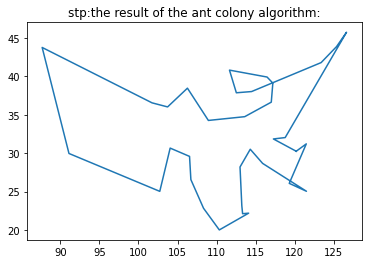

try to plot convergence plot 


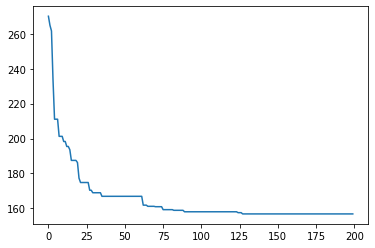

In [36]:


data = np.array(data)
data = data[:, 1:]
# 加上一行因为会回到起点
show_data = np.vstack([data, data[0]])

aco = ACO(num_city=data.shape[0], data=data.copy())
Best_path, Best = aco.run()
print("there will print Best result:")
print(Best)
Best_path = np.vstack([Best_path, Best_path[0]])
plt.plot(Best_path[:, 0], Best_path[:, 1])
plt.title('stp:the result of the ant colony algorithm:')
plt.show()
print("try to plot convergence plot ")
x_array=aco.iter_x
y_array=aco.iter_y
plt.plot(x_array,y_array)